# Venta de Casas en Peru 

## 1. Extrayendo informacion 
- Para este proyecto se extraera toda la informacion(precios,lugar,tamaño,enlace,baño,dormitorios,etc) acerca de las casas en venta de la pagina properati en donde se pondra enfasis al departamento de Lima con el fin de que un usario pueda adquirir la casa mas conveniente, tambien se tendra en cuenta el valor del dolar y su flucacion pero ello ya queda para despues.

- Se hara uso del metodo **web scraping**.
Obs: 
    - Se planeo usar Urbania pero esta restrinfica para el webscraping(codigo 403)
    
- Enlace de la pagina: [Properati](https://www.properati.com.pe/s/casa/venta)


### Tutorial
1. Lo primero que necesitaremos sera el enlace la pagina que queremos webcrapear [Properati](https://www.properati.com.pe/s/casa/venta), puede ser cualquier otra.
2. Prepararemos las librerias que utlizaremos, en caso de no tener instalarlas usado pip por ejemplo

In [ ]:
#!pip install requests beautifulsoup4

#### Librerias 

- `requests`: Esta biblioteca permite realizar solicitudes HTTP y obtener el contenido de una página web. Se utiliza para enviar solicitudes a un servidor y recibir la respuesta correspondiente. En el contexto del web scraping, se utiliza para obtener el HTML de una página web y luego analizarlo con BeautifulSoup.

- `BeautifulSoup`: Es una biblioteca de Python utilizada para analizar y extraer datos de documentos HTML y XML. Proporciona herramientas para buscar, navegar y manipular la estructura del documento. En el contexto del web scraping, BeautifulSoup se utiliza para extraer información específica de las páginas web.

- `pandas`: Es una biblioteca de Python que proporciona estructuras de datos y herramientas para el análisis y manipulación de datos. Ofrece una estructura de datos llamada DataFrame, que es útil para organizar y trabajar con datos tabulares. En el contexto del web scraping, pandas se utiliza para almacenar los datos extraídos en un formato tabular y realizar operaciones y análisis posteriores.

**Codigo:**

In [128]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

3. Comprobar que la pagina web es apta para el webscrapeo. Aqui una guia : 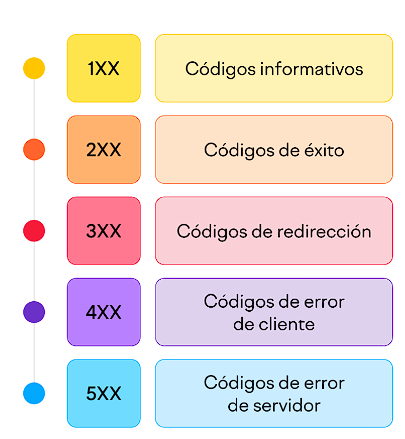

In [202]:
url = 'https://www.properati.com.pe/s/casa/venta' # enlace de la pagina a webscrapear
response = requests.get(url) # recibe la respuesta del server de la pagina
html_content = response.content # devuelve el contenido de la pagina en formato byte
response.status_code # con esto comprobamos (codigo)

200

In [130]:
response.text

'\n<!doctype html>\n<html lang="es-PE">\n<head>\n    <style type="text/css">@font-face {\n  font-display: block;\n  font-family: "bootstrap-icons";\n  src: url(/adform/webfonts/bootstrap-icons.woff2) format("woff2"),\nurl(/adform/webfonts/bootstrap-icons.woff) format("woff");\n}\n\n.bi::before,\n[class^="bi-"]::before,\n[class*=" bi-"]::before {\n  display: inline-block;\n  font-family: bootstrap-icons !important;\n  font-style: normal;\n  font-weight: normal !important;\n  font-variant: normal;\n  text-transform: none;\n  line-height: 1;\n  vertical-align: -.125em;\n  -webkit-font-smoothing: antialiased;\n  -moz-osx-font-smoothing: grayscale;\n}\n\n.bi-123::before { content: "\\f67f"; }\n.bi-alarm-fill::before { content: "\\f101"; }\n.bi-alarm::before { content: "\\f102"; }\n.bi-align-bottom::before { content: "\\f103"; }\n.bi-align-center::before { content: "\\f104"; }\n.bi-align-end::before { content: "\\f105"; }\n.bi-align-middle::before { content: "\\f106"; }\n.bi-align-start::bef

4. Inicializar un objeto BeautifulSoup para que se pueda analizar y extraer información del contenido HTML de una página web.

In [203]:
soup = BeautifulSoup(html_content, 'html.parser')

In [204]:
precios = soup.find_all('div', attrs ={"class":"price"})
prices = []
for element in precios:
    price = element.text.strip()  # Obtén el texto dentro del elemento y elimina los espacios en blanco adicionales
    prices.append(price)

In [147]:
import requests
import csv
from bs4 import BeautifulSoup

precios = soup.find_all('div', attrs ={"class":"price"})
prices = []
for element in precios:
    price = element.text.strip()  # Obtén el texto dentro del elemento y elimina los espacios en blanco adicionales
    prices.append(price)
    
# Itera sobre los elementos y extrae las ubicaciones individuales
lugares = soup.find_all('div', attrs ={"class":"listing-card__location"})
locations = []
for element in lugares:
        location = element.text.strip()
        locations.append(location)
        
    

# Encontrar todos los enlaces de las casas que comienzan con 'href="/detalle'
enlaces = soup.find_all('a', href=lambda href: href and href.startswith('/detalle'))

# Almacenar los enlaces en una lista
lista_enlaces = []
for enlace in enlaces:
    href = enlace.get('href')
    link = f"https://www.properati.com.pe{href}"  # Construir el enlace completo
    lista_enlaces.append(link)

# Imprimir la lista de enlaces
for enlace in lista_enlaces:
    print(enlace)



In [148]:
prices

['USD149,000',
 'USD363,000',
 'USD280,000',
 'USD165,000',
 'S/.245,000',
 'S/.395,000',
 'USD330,000',
 'USD1,600,000',
 'USD300,000',
 'USD400,000',
 'USD350,000',
 'USD150,000',
 'USD450,000',
 'USD430,500',
 'USD150,000',
 'USD390,000',
 'USD529,000',
 'USD217,000',
 'USD215,000',
 'USD250,000',
 'USD570,000',
 'USD315,000',
 'USD218,000',
 'USD850,000',
 'USD981,500',
 'USD118,000',
 'USD345,000',
 'USD320,000',
 'USD598,000',
 'USD140,000']

In [109]:
import csv

# Código para obtener las listas de precios y ubicaciones (previamente definido)

# Crear una lista de listas con los datos
data = []
for i in range(len(prices)):
    data.append([prices[i], locations[i]])

# Guardar los datos en un archivo CSV
with open('datos.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Precio', 'Ubicación'])  # Escribir encabezados de columna
    writer.writerows(data)  # Escribir los datos

print("Datos guardados en el archivo datos.csv.")


Datos guardados en el archivo datos.csv.


In [108]:
#len(prices)
len(locations)
#locations

30

In [72]:
import requests
import csv
from bs4 import BeautifulSoup

# URL base de las páginas
base_url = 'https://www.properati.com.pe/s/casa/venta'

# Número de páginas a extraer
num_pages = 20

# Lista para almacenar los precios
prices = []

for page in range(1, num_pages+1):
    # Construir la URL de la página actual
    url = f'{base_url}?page={page}'

    # Obtener el contenido HTML de la página
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer los precios de la página actual
    precios = soup.find_all('div', attrs={"class": "price"})
    for element in precios:
        price = element.text.strip()
        prices.append(price)

# Guardar los precios en un archivo CSV
with open('precios.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Precio'])  # Escribir el encabezado del archivo CSV

    for price in prices:
        writer.writerow([price])  # Escribir cada precio en una fila del archivo CSV

print("Los precios se han guardado en el archivo precios.csv.")


Los precios se han guardado en el archivo precios.csv.


In [134]:
from bs4 import BeautifulSoup

# Supongamos que tienes el HTML almacenado en la variable 'html'
soup = BeautifulSoup(html, 'html.parser')

links = soup.find_all('div', attrs={"class": "listing listing-card"})
enlaces = []
for element in links:
    link = element.find('a')['href']
    enlaces.append(link)

print(enlaces)


NameError: name 'html' is not defined

https://www.properati.com.pe/detalle/14032-32-5cbd-99632ff875cb-f99b05f8-aa3f-43da
https://www.properati.com.pe/detalle/14032-32-9813-2e1f9a2b1223-f06c527f-8a56-462f
https://www.properati.com.pe/detalle/14032-32-cc32-a106eec6a716-ef9ee19c-9f17-4e18
https://www.properati.com.pe/detalle/14032-32-728a-e1eac6c25ba8-e7a3554b-a169-4bd6
https://www.properati.com.pe/detalle/14032-32-40-479e37126484-dbbfc926-8f85-4635
https://www.properati.com.pe/detalle/14032-32-a88f-db19117fd35f-db7d134f-8ef3-4ac1
https://www.properati.com.pe/detalle/14032-32-daaa-a7ed7999e37a-db1fd7ec-bf51-4818
https://www.properati.com.pe/detalle/14032-32-ecdf-27843598cf70-d8da7e90-9520-4a02
https://www.properati.com.pe/detalle/14032-32-a2ba-bd6a63c866c2-d2950c20-a572-120d
https://www.properati.com.pe/detalle/14032-32-183c-314700894caf-d09b4fc0-83e0-4542
https://www.properati.com.pe/detalle/14032-32-4528-9d41a1446f3-ce18a7c0-826a-4262
https://www.properati.com.pe/detalle/14032-32-d3a6-b1263714196e-bc62e3eb-b5b0-4c5d
https:/

In [215]:
import requests
from bs4 import BeautifulSoup



base_url = 'https://www.properati.com.pe/s/casa/venta'


# Número de páginas a extraer
num_paginas = 2

# Almacenar los precios, ubicaciones y enlaces de todas las páginas
prices = []
locations = []
lista_enlaces = []

for i in range(num_paginas):
    # Construir la URL de la página actual
    url_pagina = f'{url_base}{i}'

    # Realizar la solicitud HTTP GET a la página web
    response = requests.get(url)

    # Crear el objeto BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar los precios de la página actual
    precios = soup.find_all('div', attrs={"class": "price"})

    # Extraer los precios y añadirlos a la lista general
    for element in precios:
        price = element.text.strip()
        prices.append(price)

    # Encontrar las ubicaciones de la página actual
    lugares = soup.find_all('div', attrs={"class": "listing-card__location"})

    # Extraer las ubicaciones y añadirlas a la lista general
    for element in lugares:
        location = element.text.strip()
        locations.append(location)

    # Encontrar todos los enlaces de las casas que comienzan con 'href="/detalle'
    enlaces = soup.find_all('a', href=lambda href: href and href.startswith('/detalle'))

    # Construir los enlaces completos y añadirlos a la lista general
    for enlace in enlaces:
        href = enlace.get('href')
        link = f"https://www.properati.com.pe{href}"
        lista_enlaces.append(link)

# Imprimir los precios, ubicaciones y enlaces
for i in range(len(prices)):
    print("Precio:", prices[i])
    print("Ubicación:", locations[i])
    print("Enlace:", lista_enlaces[i])
    print()


Precio: USD149,000
Ubicación: Ur. Las Delicias De Villa, Chorrillos, Lima
Enlace: https://www.properati.com.pe/detalle/14032-32-5cbd-99632ff875cb-f99b05f8-aa3f-43da

Precio: USD363,000
Ubicación: Chaclacayo, Lima
Enlace: https://www.properati.com.pe/detalle/14032-32-9813-2e1f9a2b1223-f06c527f-8a56-462f

Precio: USD280,000
Ubicación: Huarochirí, Lima
Enlace: https://www.properati.com.pe/detalle/14032-32-cc32-a106eec6a716-ef9ee19c-9f17-4e18

Precio: USD165,000
Ubicación: San Martín de Porres, Lima
Enlace: https://www.properati.com.pe/detalle/14032-32-728a-e1eac6c25ba8-e7a3554b-a169-4bd6

Precio: S/.245,000
Ubicación: Lurin, Lima
Enlace: https://www.properati.com.pe/detalle/14032-32-40-479e37126484-dbbfc926-8f85-4635

Precio: S/.395,000
Ubicación: Castilla, Piura
Enlace: https://www.properati.com.pe/detalle/14032-32-a88f-db19117fd35f-db7d134f-8ef3-4ac1

Precio: USD330,000
Ubicación: Ur. Pro Quinto Sector Ii Etapa, Los Olivos, Lima
Enlace: https://www.properati.com.pe/detalle/14032-32-daaa

In [214]:
import requests
from bs4 import BeautifulSoup
import csv

# Número de páginas a extraer
num_paginas = 2

# URL base de la página
base_url = 'https://www.properati.com.pe/s/casa/venta'

# Almacenar los precios, ubicaciones y enlaces de todas las páginas
data = []

# Iterar sobre las páginas
for i in range(num_paginas):
    # Construir la URL de la página actual
    url_pagina = f'{url_base}{i}'

    # Realizar la solicitud HTTP GET a la página web
    response = requests.get(url)

    # Crear el objeto BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar los precios de la página actual
    precios = soup.find_all('div', attrs={"class": "price"})

    # Encontrar las ubicaciones de la página actual
    lugares = soup.find_all('div', attrs={"class": "listing-card__location"})

    # Encontrar todos los enlaces de las casas que comienzan con 'href="/detalle'
    enlaces = soup.find_all('a', href=lambda href: href and href.startswith('/detalle'))

    # Extraer los precios, ubicaciones y enlaces y añadirlos a la lista de datos
    for j in range(len(precios)):
        price = precios[j].text.strip()
        location = lugares[j].text.strip()
        href = enlaces[j].get('href')
        link = f"https://www.properati.com.pe{href}"
        data.append([price, location, link])

# Guardar los datos en un archivo CSV
with open('data.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Precio', 'Ubicación', 'Enlace'])  # Escribir la fila de encabezado
    writer.writerows(data)  # Escribir los datos

print("Los datos se han guardado correctamente en el archivo 'data.csv'.")


Los datos se han guardado correctamente en el archivo 'data.csv'.


In [222]:
import requests
from bs4 import BeautifulSoup

def obtener_datos(num_paginas):
    # URL base
    url_base = 'https://www.properati.com.pe/s/casa/venta/'

    # Listas para almacenar los precios, lugares y enlaces
    precios = []
    lugares = []
    enlaces = []

    # Recorrer las páginas
    for i in range(1, num_paginas + 1):
        # Construir la URL de la página actual
        url_pagina = f'{url_base}{i}'

        # Realizar la solicitud HTTP a la página actual
        response = requests.get(url_pagina)

        # Verificar si la solicitud fue exitosa
        if response.status_code == 200:
            # Obtener el contenido HTML de la página
            html = response.text

            # Crear un objeto BeautifulSoup para parsear el HTML
            soup = BeautifulSoup(html, 'html.parser')

            # Encontrar los elementos de precios en la página actual
            elementos_precios = soup.find_all('div', class_='price')

            # Obtener los precios de los elementos y agregarlos a la lista
            precios_pagina = [elemento.get_text(strip=True) for elemento in elementos_precios]
            precios.extend(precios_pagina)

            # Encontrar los elementos de lugares en la página actual
            elementos_lugares = soup.find_all('div', class_='listing-card__location')

            # Obtener los lugares de los elementos y agregarlos a la lista
            lugares_pagina = [elemento.get_text(strip=True) for elemento in elementos_lugares]
            lugares.extend(lugares_pagina)

            # Encontrar los elementos de enlaces en la página actual
            elementos_enlaces = soup.find_all('a', href=lambda href: href and href.startswith('/detalle'))

            # Obtener los enlaces completos y agregarlos a la lista
            enlaces_pagina = [f'https://www.properati.com.pe{elemento["href"]}' for elemento in elementos_enlaces]
            enlaces.extend(enlaces_pagina)
        else:
            print(f'Error al acceder a la página {url_pagina}')
            continue

    return precios, lugares, enlaces

# Obtener el número de páginas a recorrer
num_paginas = int(input('Ingrese el número de páginas a recorrer: '))

# Obtener los precios, lugares y enlaces de las casas en las páginas especificadas
precios, lugares, enlaces = obtener_datos(num_paginas)

# Imprimir los precios, lugares y enlaces obtenidos
for precio, lugar, enlace in zip(precios, lugares, enlaces):
    print(f'Precio: {precio}, Lugar: {lugar}, Enlace: {enlace}')


Ingrese el número de páginas a recorrer: 3
Precio: USD149,000, Lugar: Ur. Las Delicias De Villa, Chorrillos, Lima, Enlace: https://www.properati.com.pe/detalle/14032-32-5cbd-99632ff875cb-f99b05f8-aa3f-43da
Precio: USD363,000, Lugar: Chaclacayo, Lima, Enlace: https://www.properati.com.pe/detalle/14032-32-9813-2e1f9a2b1223-f06c527f-8a56-462f
Precio: USD280,000, Lugar: Huarochirí, Lima, Enlace: https://www.properati.com.pe/detalle/14032-32-cc32-a106eec6a716-ef9ee19c-9f17-4e18
Precio: USD165,000, Lugar: San Martín de Porres, Lima, Enlace: https://www.properati.com.pe/detalle/14032-32-728a-e1eac6c25ba8-e7a3554b-a169-4bd6
Precio: S/.245,000, Lugar: Lurin, Lima, Enlace: https://www.properati.com.pe/detalle/14032-32-40-479e37126484-dbbfc926-8f85-4635
Precio: S/.395,000, Lugar: Castilla, Piura, Enlace: https://www.properati.com.pe/detalle/14032-32-a88f-db19117fd35f-db7d134f-8ef3-4ac1
Precio: USD330,000, Lugar: Ur. Pro Quinto Sector Ii Etapa, Los Olivos, Lima, Enlace: https://www.properati.com.p

In [223]:
nombre_archivo = 'datos_casas.csv'
with open(nombre_archivo, 'w', newline='', encoding='utf-8') as archivo_csv:
    escritor = csv.writer(archivo_csv)

    # Escribir el encabezado del archivo CSV
    escritor.writerow(['Precio', 'Lugar', 'Enlace'])

    # Escribir los datos en el archivo CSV
    for precio, lugar, enlace in zip(precios, lugares, enlaces):
        escritor.writerow([precio, lugar, enlace])

print(f'Los datos se han guardado exitosamente en el archivo {nombre_archivo}')

Los datos se han guardado exitosamente en el archivo datos_casas.csv
